In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string 
import nltk
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/file2.csv')
print(df.shape)
df

(1000, 4)


,Unnamed: 0,Date,User,Tweet
0,0,2022-12-09 18:44:20+00:00,Sarbazirani3,@F_karamizand @JosepBorrellF @EUCouncil @EU_Co...
1,1,2022-12-09 18:44:18+00:00,yehrgikfm63539,Morning Starts not With a $Coffee \n\n#Ukraine...
2,2,2022-12-09 18:44:08+00:00,Flingan67,M777 in action 🔥🤙\n\n#UkraineWar #UkrainianArm...
3,3,2022-12-09 18:43:36+00:00,Covid_vingt,@qubec593 @PerlesUrbex Il manque #UkraineWar ! 😬
4,4,2022-12-09 18:43:13+00:00,TechnologyOrg,Ukrainian #Plastun station hears the unaware e...
...,...,...,...,...
995,995,2022-12-09 03:05:10+00:00,dndtirani,CATAT! Dewan Pers: KUHP Baru Ancam Kemerdekaan...
996,996,2022-12-09 03:04:44+00:00,dndtirani,"Soal Sosok Capres, Zulhas: Ganjar Pasti Pancas..."
997,997,2022-12-09 03:04:22+00:00,dndtirani,Respons Nasdem Soal Anies Baswedan Dilaporkan ...
998,998,2022-12-09 03:04:03+00:00,dndtirani,"Ali Munhanif: Kalau Parpol Tidak Direformasi, ..."


In [ ]:
#df1 = df.append(df.iloc[20:30,:])
 
#df1.duplicated().sum()

duplicates

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Date        1000 non-null   object
 2   User        1000 non-null   object
 3   Tweet       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


remove pattern in the input text

In [ ]:
def remove_pattern(input_txt,pattern):
  r = re.findall(pattern,input_txt)
  for word in r:
    input_txt = re.sub(word,"",input_txt)
  return input_txt

#remove twitter handle(@user)


In [ ]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['Tweet'],"@[\w]*")

In [ ]:
df.head()


,Unnamed: 0,Date,User,Tweet,clean_tweet
0,0,2022-12-09 18:44:20+00:00,Sarbazirani3,@F_karamizand @JosepBorrellF @EUCouncil @EU_Co...,If you don't do anything for the Irani...
1,1,2022-12-09 18:44:18+00:00,yehrgikfm63539,Morning Starts not With a $Coffee \n\n#Ukraine...,Morning Starts not With a $Coffee \n\n#Ukraine...
2,2,2022-12-09 18:44:08+00:00,Flingan67,M777 in action 🔥🤙\n\n#UkraineWar #UkrainianArm...,M777 in action 🔥🤙\n\n#UkraineWar #UkrainianArm...
3,3,2022-12-09 18:43:36+00:00,Covid_vingt,@qubec593 @PerlesUrbex Il manque #UkraineWar ! 😬,Il manque #UkraineWar ! 😬
4,4,2022-12-09 18:43:13+00:00,TechnologyOrg,Ukrainian #Plastun station hears the unaware e...,Ukrainian #Plastun station hears the unaware e...


#remove special characters,numbers and punctations

In [ ]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,Unnamed: 0,Date,User,Tweet,clean_tweet
0,0,2022-12-09 18:44:20+00:00,Sarbazirani3,@F_karamizand @JosepBorrellF @EUCouncil @EU_Co...,If you don t do anything for the Irani...
1,1,2022-12-09 18:44:18+00:00,yehrgikfm63539,Morning Starts not With a $Coffee \n\n#Ukraine...,Morning Starts not With a Coffee #Ukraine #...
2,2,2022-12-09 18:44:08+00:00,Flingan67,M777 in action 🔥🤙\n\n#UkraineWar #UkrainianArm...,M in action #UkraineWar #UkrainianArmy ...
3,3,2022-12-09 18:43:36+00:00,Covid_vingt,@qubec593 @PerlesUrbex Il manque #UkraineWar ! 😬,Il manque #UkraineWar
4,4,2022-12-09 18:43:13+00:00,TechnologyOrg,Ukrainian #Plastun station hears the unaware e...,Ukrainian #Plastun station hears the unaware e...


#remove short words



In [ ]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()


,Unnamed: 0,Date,User,Tweet,clean_tweet
0,0,2022-12-09 18:44:20+00:00,Sarbazirani3,@F_karamizand @JosepBorrellF @EUCouncil @EU_Co...,anything Iranian people expel ambassadors Mull...
1,1,2022-12-09 18:44:18+00:00,yehrgikfm63539,Morning Starts not With a $Coffee \n\n#Ukraine...,Morning Starts With Coffee #Ukraine #UkraineWa...
2,2,2022-12-09 18:44:08+00:00,Flingan67,M777 in action 🔥🤙\n\n#UkraineWar #UkrainianArm...,action #UkraineWar #UkrainianArmy #UkraineWarN...
3,3,2022-12-09 18:43:36+00:00,Covid_vingt,@qubec593 @PerlesUrbex Il manque #UkraineWar ! 😬,manque #UkraineWar
4,4,2022-12-09 18:43:13+00:00,TechnologyOrg,Ukrainian #Plastun station hears the unaware e...,Ukrainian #Plastun station hears unaware enemy...


# individual words considered as tokens


In [ ]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()


0    [anything, Iranian, people, expel, ambassadors...
1    [Morning, Starts, With, Coffee, #Ukraine, #Ukr...
2    [action, #UkraineWar, #UkrainianArmy, #Ukraine...
3                                [manque, #UkraineWar]
4    [Ukrainian, #Plastun, station, hears, unaware,...
Name: clean_tweet, dtype: object

# stem the words


In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [anyth, iranian, peopl, expel, ambassador, mul...
1    [morn, start, with, coffe, #ukrain, #ukrainewa...
2    [action, #ukrainewar, #ukrainianarmi, #ukraine...
3                                 [manqu, #ukrainewar]
4    [ukrainian, #plastun, station, hear, unawar, e...
Name: clean_tweet, dtype: object

# combine words into single sentence


In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,Unnamed: 0,Date,User,Tweet,clean_tweet
0,0,2022-12-09 18:44:20+00:00,Sarbazirani3,@F_karamizand @JosepBorrellF @EUCouncil @EU_Co...,anyth iranian peopl expel ambassador mullah re...
1,1,2022-12-09 18:44:18+00:00,yehrgikfm63539,Morning Starts not With a $Coffee \n\n#Ukraine...,morn start with coffe #ukrain #ukrainewar #sta...
2,2,2022-12-09 18:44:08+00:00,Flingan67,M777 in action 🔥🤙\n\n#UkraineWar #UkrainianArm...,action #ukrainewar #ukrainianarmi #ukrainewarn...
3,3,2022-12-09 18:43:36+00:00,Covid_vingt,@qubec593 @PerlesUrbex Il manque #UkraineWar ! 😬,manqu #ukrainewar
4,4,2022-12-09 18:43:13+00:00,TechnologyOrg,Ukrainian #Plastun station hears the unaware e...,ukrainian #plastun station hear unawar enemi c...


Exploratory Data Analysis


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


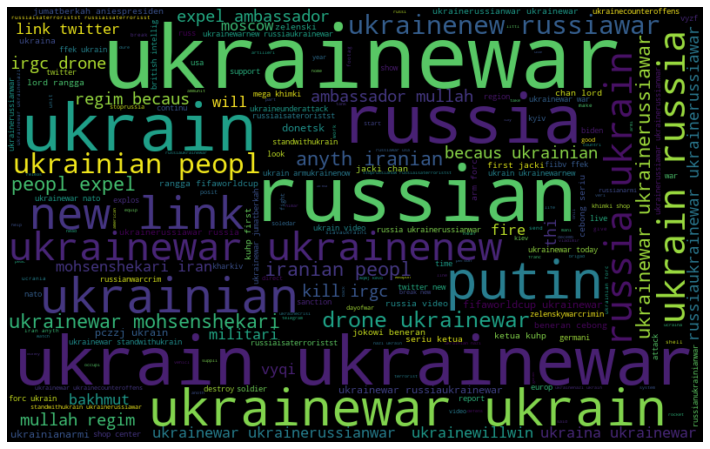

In [ ]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# extract the hashtag


In [ ]:
df.head()


,Unnamed: 0,Date,User,Tweet,clean_tweet,0
0,0,2022-12-09 18:44:20+00:00,Sarbazirani3,@F_karamizand @JosepBorrellF @EUCouncil @EU_Co...,anyth iranian peopl expel ambassador mullah re...,0.0
1,1,2022-12-09 18:44:18+00:00,yehrgikfm63539,Morning Starts not With a $Coffee \n\n#Ukraine...,morn start with coffe #ukrain #ukrainewar #sta...,0.0
2,2,2022-12-09 18:44:08+00:00,Flingan67,M777 in action 🔥🤙\n\n#UkraineWar #UkrainianArm...,action #ukrainewar #ukrainianarmi #ukrainewarn...,0.0
3,3,2022-12-09 18:43:36+00:00,Covid_vingt,@qubec593 @PerlesUrbex Il manque #UkraineWar ! 😬,manqu #ukrainewar,0.0
4,4,2022-12-09 18:43:13+00:00,TechnologyOrg,Ukrainian #Plastun station hears the unaware e...,ukrainian #plastun station hear unawar enemi c...,0.0


,Unnamed: 0,Date,User,Tweet,clean_tweet,0,0
0,0,2022-12-09 18:44:20+00:00,Sarbazirani3,@F_karamizand @JosepBorrellF @EUCouncil @EU_Co...,anyth iranian peopl expel ambassador mullah re...,0.0,0.0
1,1,2022-12-09 18:44:18+00:00,yehrgikfm63539,Morning Starts not With a $Coffee \n\n#Ukraine...,morn start with coffe #ukrain #ukrainewar #sta...,0.0,0.0
2,2,2022-12-09 18:44:08+00:00,Flingan67,M777 in action 🔥🤙\n\n#UkraineWar #UkrainianArm...,action #ukrainewar #ukrainianarmi #ukrainewarn...,0.0,0.0
3,3,2022-12-09 18:43:36+00:00,Covid_vingt,@qubec593 @PerlesUrbex Il manque #UkraineWar ! 😬,manqu #ukrainewar,0.0,0.0
4,4,2022-12-09 18:43:13+00:00,TechnologyOrg,Ukrainian #Plastun station hears the unaware e...,ukrainian #plastun station hear unawar enemi c...,0.0,0.0
...,...,...,...,...,...,...,...
995,995,2022-12-09 03:05:10+00:00,dndtirani,CATAT! Dewan Pers: KUHP Baru Ancam Kemerdekaan...,catat dewan per kuhp baru ancam kemerdekaan pe...,0.0,0.0
996,996,2022-12-09 03:04:44+00:00,dndtirani,"Soal Sosok Capres, Zulhas: Ganjar Pasti Pancas...",soal sosok capr zulha ganjar pasti pancasilai ...,0.0,0.0
997,997,2022-12-09 03:04:22+00:00,dndtirani,Respons Nasdem Soal Anies Baswedan Dilaporkan ...,respon nasdem soal ani baswedan dilaporkan baw...,0.0,0.0
998,998,2022-12-09 03:04:03+00:00,dndtirani,"Ali Munhanif: Kalau Parpol Tidak Direformasi, ...",munhanif kalau parpol tidak direformasi kita t...,0.0,0.0


In [75]:
df.drop(['User','Tweet','Date'],axis=1)


,Unnamed: 0,clean_tweet,0,0
0,0,anyth iranian peopl expel ambassador mullah re...,0.0,0.0
1,1,morn start with coffe #ukrain #ukrainewar #sta...,0.0,0.0
2,2,action #ukrainewar #ukrainianarmi #ukrainewarn...,0.0,0.0
3,3,manqu #ukrainewar,0.0,0.0
4,4,ukrainian #plastun station hear unawar enemi c...,0.0,0.0
...,...,...,...,...
995,995,catat dewan per kuhp baru ancam kemerdekaan pe...,0.0,0.0
996,996,soal sosok capr zulha ganjar pasti pancasilai ...,0.0,0.0
997,997,respon nasdem soal ani baswedan dilaporkan baw...,0.0,0.0
998,998,munhanif kalau parpol tidak direformasi kita t...,0.0,0.0


In [76]:
from textblob import TextBlob

In [81]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['clean_tweet'].apply(getSubjectivity)
df['Polarity'] = df['clean_tweet'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Unnamed: 0,Date,User,Tweet,clean_tweet,0,0,Subjectivity,Polarity
0,0,2022-12-09 18:44:20+00:00,Sarbazirani3,@F_karamizand @JosepBorrellF @EUCouncil @EU_Co...,anyth iranian peopl expel ambassador mullah re...,0.0,0.0,0.000000,0.00
1,1,2022-12-09 18:44:18+00:00,yehrgikfm63539,Morning Starts not With a $Coffee \n\n#Ukraine...,morn start with coffe #ukrain #ukrainewar #sta...,0.0,0.0,0.000000,0.00
2,2,2022-12-09 18:44:08+00:00,Flingan67,M777 in action 🔥🤙\n\n#UkraineWar #UkrainianArm...,action #ukrainewar #ukrainianarmi #ukrainewarn...,0.0,0.0,0.100000,0.10
3,3,2022-12-09 18:43:36+00:00,Covid_vingt,@qubec593 @PerlesUrbex Il manque #UkraineWar ! 😬,manqu #ukrainewar,0.0,0.0,0.000000,0.00
4,4,2022-12-09 18:43:13+00:00,TechnologyOrg,Ukrainian #Plastun station hears the unaware e...,ukrainian #plastun station hear unawar enemi c...,0.0,0.0,0.000000,0.00
...,...,...,...,...,...,...,...,...,...
995,995,2022-12-09 03:05:10+00:00,dndtirani,CATAT! Dewan Pers: KUHP Baru Ancam Kemerdekaan...,catat dewan per kuhp baru ancam kemerdekaan pe...,0.0,0.0,0.333333,0.25
996,996,2022-12-09 03:04:44+00:00,dndtirani,"Soal Sosok Capres, Zulhas: Ganjar Pasti Pancas...",soal sosok capr zulha ganjar pasti pancasilai ...,0.0,0.0,0.333333,0.25
997,997,2022-12-09 03:04:22+00:00,dndtirani,Respons Nasdem Soal Anies Baswedan Dilaporkan ...,respon nasdem soal ani baswedan dilaporkan baw...,0.0,0.0,0.333333,0.25
998,998,2022-12-09 03:04:03+00:00,dndtirani,"Ali Munhanif: Kalau Parpol Tidak Direformasi, ...",munhanif kalau parpol tidak direformasi kita t...,0.0,0.0,0.333333,0.25


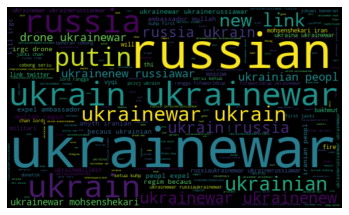

In [83]:
allWords = ' '.join([twts for twts in df['clean_tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()
     

In [84]:
def getAnalysis(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Unnamed: 0,Date,User,Tweet,clean_tweet,0,0,Subjectivity,Polarity,Analysis
0,0,2022-12-09 18:44:20+00:00,Sarbazirani3,@F_karamizand @JosepBorrellF @EUCouncil @EU_Co...,anyth iranian peopl expel ambassador mullah re...,0.0,0.0,0.000000,0.00,Neutral
1,1,2022-12-09 18:44:18+00:00,yehrgikfm63539,Morning Starts not With a $Coffee \n\n#Ukraine...,morn start with coffe #ukrain #ukrainewar #sta...,0.0,0.0,0.000000,0.00,Neutral
2,2,2022-12-09 18:44:08+00:00,Flingan67,M777 in action 🔥🤙\n\n#UkraineWar #UkrainianArm...,action #ukrainewar #ukrainianarmi #ukrainewarn...,0.0,0.0,0.100000,0.10,Positive
3,3,2022-12-09 18:43:36+00:00,Covid_vingt,@qubec593 @PerlesUrbex Il manque #UkraineWar ! 😬,manqu #ukrainewar,0.0,0.0,0.000000,0.00,Neutral
4,4,2022-12-09 18:43:13+00:00,TechnologyOrg,Ukrainian #Plastun station hears the unaware e...,ukrainian #plastun station hear unawar enemi c...,0.0,0.0,0.000000,0.00,Neutral
...,...,...,...,...,...,...,...,...,...,...
995,995,2022-12-09 03:05:10+00:00,dndtirani,CATAT! Dewan Pers: KUHP Baru Ancam Kemerdekaan...,catat dewan per kuhp baru ancam kemerdekaan pe...,0.0,0.0,0.333333,0.25,Positive
996,996,2022-12-09 03:04:44+00:00,dndtirani,"Soal Sosok Capres, Zulhas: Ganjar Pasti Pancas...",soal sosok capr zulha ganjar pasti pancasilai ...,0.0,0.0,0.333333,0.25,Positive
997,997,2022-12-09 03:04:22+00:00,dndtirani,Respons Nasdem Soal Anies Baswedan Dilaporkan ...,respon nasdem soal ani baswedan dilaporkan baw...,0.0,0.0,0.333333,0.25,Positive
998,998,2022-12-09 03:04:03+00:00,dndtirani,"Ali Munhanif: Kalau Parpol Tidak Direformasi, ...",munhanif kalau parpol tidak direformasi kita t...,0.0,0.0,0.333333,0.25,Positive


In [105]:

print('Printing Positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['clean_tweet'][i])
    print()
    j=j+1

Printing Positive tweets:

1) action #ukrainewar #ukrainianarmi #ukrainewarnew #ukrainefrontlin #ukrainecounteroffens http czcc

2) after whole year win ukrainian side late publish mani video photo their dead wound prepar their public defeat that will follow #ukrainefrontlin #ukrainecounteroffens #ukrainerussiawar #ukrainerussiawar #ukrainewar #ukrain http uueavmybpm

3) depart defens releas detail latest million packag #ukrainewar #ukrainian #ukrain #ukrainerussiawar #ukrainerussianwar #ukrainianarmi #ukraina #russiaisaterroristst http mmngxvsu

4) noth good suppli weapon ukrain like ad firewood fire will respons death #ukrain #ukrainewar http lxbsri

5) there great countri nation there great peopl america son daughter respect over world past tens #blm http johh #ukrainewar http znmcqufv http rnyvjhmmz #biden #trump #gqp #racism #ukrain #fact

6) footag gopro ukrain from special oper forc militari destroy russian soldier http svbe lxgkh #ukrain #drone #ukrainewar #javelin #himar #stin

In [103]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['clean_tweet'][i])
    print()
    j=j+1

Printing negative tweets:

1) english street artist #banksi made honorari citizen irpin with work immortalis tragic histori citi struggl idea reviv #ukrainewar http mgvgfkh

2) black queen releas from russia that bladimir pute could have chanc against ukrain #ukrainewar #russiaukrainewar

3) russian opposit leader ilya yashin sentenc year prison opinion about ukrain year prison just speak mind mad #russia #russiaukrainewar #ukrainewar http bnwvt onvt

4) hell dark everyon step thi hell defeat dark bring back light will hero forev aliv dead glori honor these women #slavaukrainii #ukrainewar

5) sorri cold love america want #paulwhelan then give #vadimkrasikov both symptomat world gone tell #nato servant germani that that deal then #putin meet with without corrupt #zelenski #ukrainewar http kpfd

6) result your activ look other #blacklivesmatt http jjtmorz #ukrain http xqof http #biden #trump #trumptreason #trumpcoupattempt #gqp #racism #fascism #violenc #abortionright #ukrainewar #russi

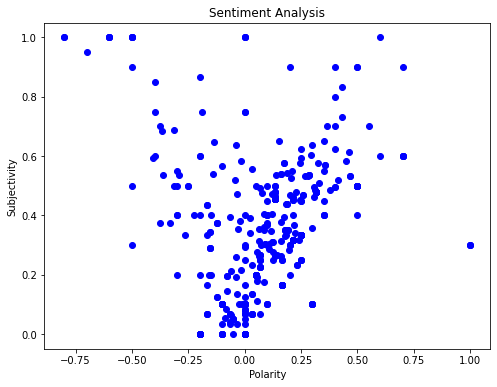

In [88]:

plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [107]:

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['clean_tweet']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

28.2

In [108]:

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['clean_tweet']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

11.5

In [91]:
df['Analysis'].value_counts()


Neutral     603
Positive    282
Negative    115
Name: Analysis, dtype: int64

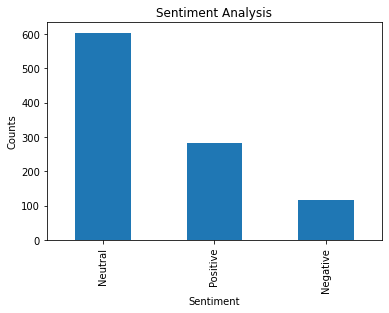

In [92]:

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

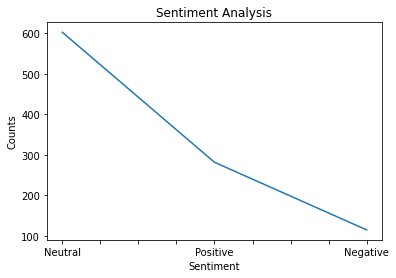

In [93]:

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()